In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/탄소중립(59,295건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '블로그'))
    return df

twitter = load_all_data()

## 트위터 Sheet

In [4]:
twitter.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2     16
Unnamed: 3    200
dtype: int64

In [5]:
twitter.columns = twitter.iloc[0]
twitter.drop(0, inplace=True, axis=0)
twitter = twitter[twitter['내용'].str.len() < 1000]

print(twitter.shape)
twitter.head()

(7168, 4)


,작성일,작성자,제목,내용
23,2022/06/20,gnfeel,2050 탄소중립을 향한 최종 도민권고안 채택,2050 탄소중립을 향한 최종 도민권고안 채택 \n \n경남 기후도민회의 마지막 전...
26,2022/06/10,soulmas22,생활 속 탄소중립,탄소중립이란 \n탄소중립이란 대기 중 온실가스 농도 증가를 막기 위해 온실가스 배출...
28,2022/06/01,eunyoung1122,[과학일기]탄소 중립,안녕하세요? 고운맘입니다. \n \n탄소중립 \n이것이 뭔지 아세요? \n학교에서 ...
34,2022/06/15,kiwc3571234,"당진시에너지센터, 탄소중립 에너지전환 아이디어 공모","당진시에너지센터, 탄소중립 에너지전환 아이디어 공모 \n \n기사입력 : 2022...."
42,2022/06/29,thankslee57,"탄소중립 환경교육, 안양시는 유치원부터 시작합니다","최대호 시장 “미래세대 환경문제 인식, 탄소중립 실천” \n안양시가 미래 세대인 유..."


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_twitter = tfdif(twitter['내용'])

In [8]:
tfidf_twitter

,00,000원,02,03,04,05,06,10,100,10분간,...,활성화를,활용,활용한,활용해,회장,회장은,효과가,후보,후보는,힘을
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.116262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7163,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.160622,0.0,0.0,0.0,0.0,0.0,0.0
7164,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7165,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7166,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import pickle

tfidf_twitter.to_pickle('tfidf_twitter.pkl')

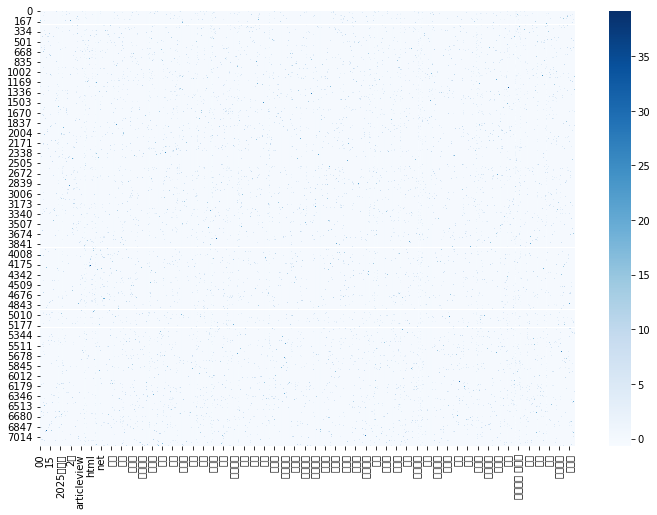

In [10]:
tfidf_twitter = (tfidf_twitter - tfidf_twitter.mean()) / tfidf_twitter.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_twitter, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above